In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('konsumsi-bbm.csv')

In [5]:
df.head()

,Jarak_Tempuh,Konsumsi_BBM
0,5,1.8
1,10,3.1
2,15,4.5
3,20,6.3
4,25,7.1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Jarak_Tempuh  20 non-null     int64  
 1   Konsumsi_BBM  20 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 452.0 bytes


In [7]:
df.describe()

,Jarak_Tempuh,Konsumsi_BBM
count,20.000000,20.000000
mean,52.500000,13.715000
std,29.580399,7.143512
min,5.000000,1.800000
25%,28.750000,8.075000
50%,52.500000,13.950000
75%,76.250000,19.325000
max,100.000000,25.300000


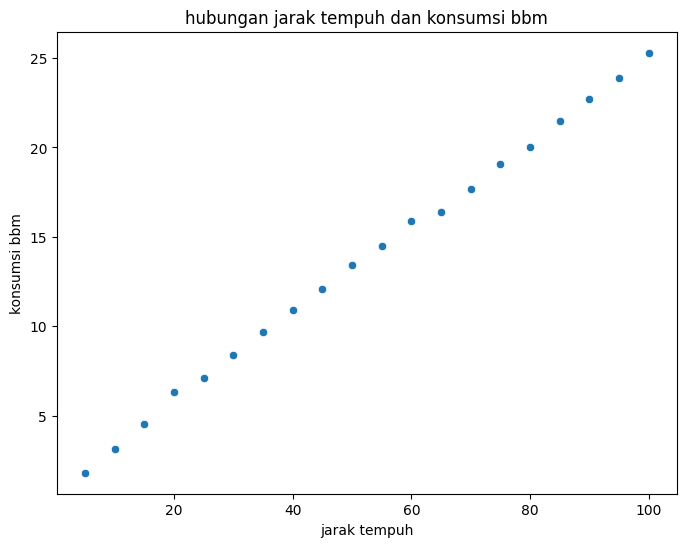

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Jarak_Tempuh', y='Konsumsi_BBM', data=df)
plt.title('hubungan jarak tempuh dan konsumsi bbm')
plt.xlabel('jarak tempuh')
plt.ylabel('konsumsi bbm')
plt.show()

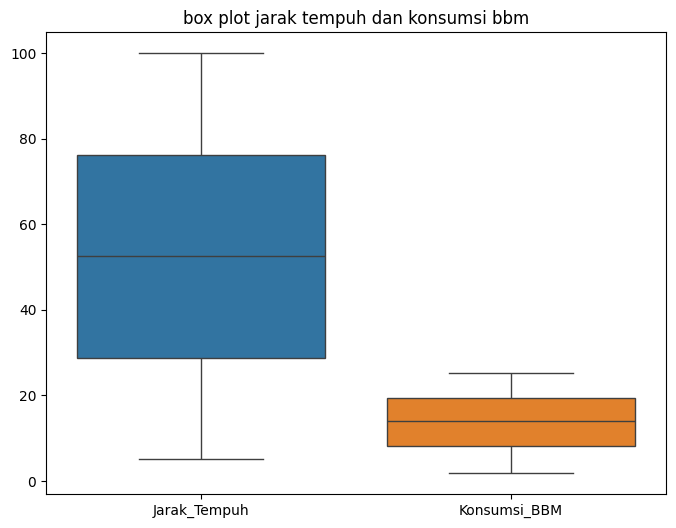

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['Jarak_Tempuh', 'Konsumsi_BBM']])
plt.title('box plot jarak tempuh dan konsumsi bbm')
plt.show()

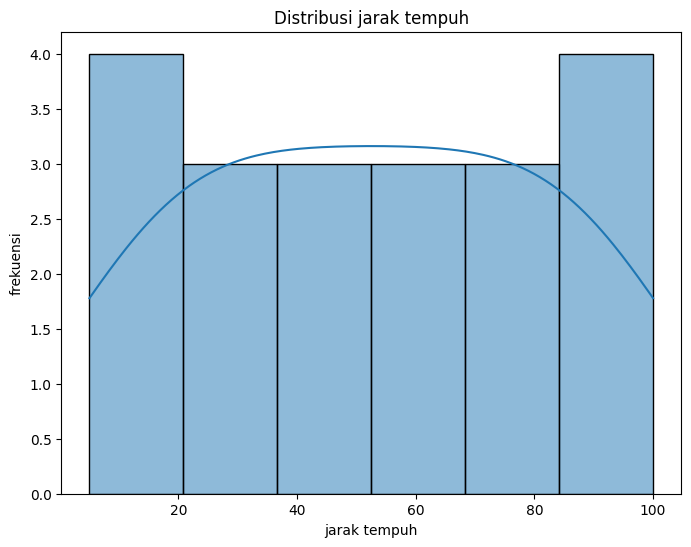

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Jarak_Tempuh'], kde=True)
plt.title('Distribusi jarak tempuh')
plt.xlabel('jarak tempuh')
plt.ylabel('frekuensi')
plt.show()

In [11]:
x = df[['Jarak_Tempuh']]
y = df['Konsumsi_BBM']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
model = LinearRegression()

In [14]:
model.fit(x_train, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(x_test)

In [16]:
jarak_baru = [60, 70, 80]
konsumsi_prediksi = model.predict([[jarak] for jarak in jarak_baru])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [17]:
print('Simulasi konsumsi BBM:')
for i in range(len(jarak_baru)):
    print(f'jarak tempuh: {jarak_baru[i]}, konsumsi BBM prediksi: {konsumsi_prediksi[i]}')

Simulasi konsumsi BBM:
jarak tempuh: 60, konsumsi BBM prediksi: 15.586532951289398
jarak tempuh: 70, konsumsi BBM prediksi: 17.974377921882066
jarak tempuh: 80, konsumsi BBM prediksi: 20.362222892474737


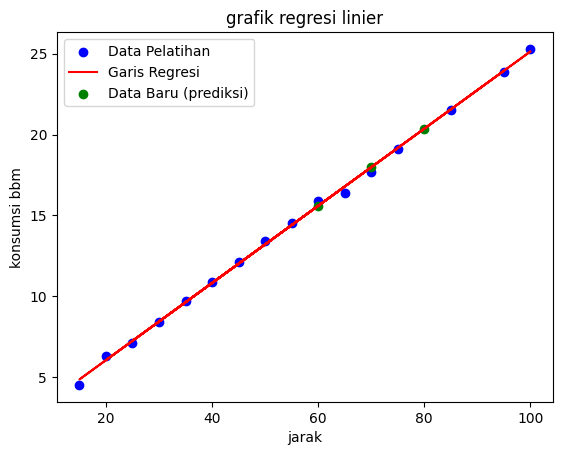

In [18]:
plt.scatter(x_train, y_train, color='blue', label='Data Pelatihan')
plt.plot(x_train, model.predict(x_train), color='red', label='Garis Regresi')
plt.scatter(jarak_baru, konsumsi_prediksi, color='green', label='Data Baru (prediksi)')

plt.xlabel('jarak')
plt.ylabel('konsumsi bbm')
plt.title('grafik regresi linier')
plt.legend()
plt.show()

In [19]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [20]:
print(f'Mean Squarred Error {mse}')
print(f'R-squared (R2): {r2}')

Mean Squarred Error 0.21504278213809458
R-squared (R2): 0.9976218658320366
